In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.00, high=90.00, size=700)
lngs = np.random.uniform(low=-180.00, high=180.00, size=700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    cities.append(city)


# Print the city count to confirm sufficient count
test2 = list(zip(lats,lngs))
zipped_list = test2[:]
zipped_list_2 = list(test2)



## Perform API Calls

In [3]:
# OpenWeatherMap API Key

lat = lats
lon = lngs
units = "metric"
temps = []
humidity = []
cloudiness = []
windspeed = []

# tests = []
# tests2 = []
# thing = 0
# thing2 = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
q_url = f"{url}appid={api_key}&units={units}&lat={lat}&lon={lon}"


for item in zipped_list_2:
    print(f"Searching for city: {cities[zipped_list_2.index(item)]}")
    
    response = requests.get(f"{url}appid={api_key}&units={units}&lat={item[0]}&lon={item[1]}").json()
    temps.append(response['main']['temp'])
    windspeed.append(response['wind']['speed'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])

# response = requests.get(f"{url}appid={api_key}&units={units}&lat={lat[3]}&lon={lon[3]}").json()
# response

Searching for city: bokspits
Searching for city: ruatoria
Searching for city: san quintin
Searching for city: kodiak
Searching for city: rocha
Searching for city: broken hill
Searching for city: kaitangata
Searching for city: vaini
Searching for city: richards bay
Searching for city: bam
Searching for city: krasnoselkup
Searching for city: deputatskiy
Searching for city: ambilobe
Searching for city: dalvik
Searching for city: kaitangata
Searching for city: saldanha
Searching for city: banjar
Searching for city: beringovskiy
Searching for city: belushya guba
Searching for city: linjiang
Searching for city: rikitea
Searching for city: qaanaaq
Searching for city: taolanaro
Searching for city: taolanaro
Searching for city: carballo
Searching for city: iqaluit
Searching for city: prince rupert
Searching for city: ushuaia
Searching for city: tura
Searching for city: portland
Searching for city: trairi
Searching for city: ostersund
Searching for city: nenjiang
Searching for city: mokhsogollok

Searching for city: bengkulu
Searching for city: saint anthony
Searching for city: acurenam
Searching for city: talnakh
Searching for city: grand river south east
Searching for city: kidal
Searching for city: ribeira grande
Searching for city: rikitea
Searching for city: dunedin
Searching for city: ilulissat
Searching for city: saskylakh
Searching for city: ushuaia
Searching for city: castro
Searching for city: kieta
Searching for city: hofn
Searching for city: hithadhoo
Searching for city: taolanaro
Searching for city: surab
Searching for city: bredasdorp
Searching for city: kushmurun
Searching for city: punta arenas
Searching for city: hermanus
Searching for city: alofi
Searching for city: cedar city
Searching for city: taolanaro
Searching for city: vila velha
Searching for city: qaanaaq
Searching for city: rikitea
Searching for city: padang
Searching for city: albany
Searching for city: rikitea
Searching for city: tura
Searching for city: cockburn harbour
Searching for city: muravle

Searching for city: passo de camaragibe
Searching for city: karaul
Searching for city: severo-kurilsk
Searching for city: kavieng
Searching for city: mys shmidta
Searching for city: saint george
Searching for city: kruisfontein
Searching for city: albany
Searching for city: birao
Searching for city: aswan
Searching for city: eenhana
Searching for city: amderma
Searching for city: krasnoselkup
Searching for city: mataura
Searching for city: college
Searching for city: yellowknife
Searching for city: ivanteyevka
Searching for city: puerto ayora
Searching for city: guerrero negro
Searching for city: pevek
Searching for city: laguna
Searching for city: bubaque
Searching for city: cape town
Searching for city: rikitea
Searching for city: longonjo
Searching for city: cidreira
Searching for city: atuona
Searching for city: novobiryusinskiy
Searching for city: ushuaia
Searching for city: punta arenas
Searching for city: camacha
Searching for city: vaini
Searching for city: galiwinku
Searching 

In [6]:


weather_df = pd.DataFrame(data=cities)
weather_df["Latitude"] = lats
weather_df["Longitude"] = lon
weather_df["Temparature"] = temps
weather_df["Humidity"] = humidity
weather_df["Cloudiness"] = cloudiness
weather_df["Windspeed"] = windspeed
weather_df["Latitude ABS Value"] = abs(lats)

In [7]:
weather_df.head(20)

,0,Latitude,Longitude,Temparature,Humidity,Cloudiness,Windspeed,Latitude ABS Value
0,bokspits,-27.009017,21.366358,21.89,24,0,5.87,27.009017
1,ruatoria,-36.876549,179.057907,15.29,100,80,5.52,36.876549
2,san quintin,27.719537,-121.208304,20.64,100,76,4.62,27.719537
3,kodiak,49.876590,-159.043444,11.89,98,68,9.97,49.876590
4,rocha,-42.865915,-47.253017,10.79,99,0,9.32,42.865915
5,broken hill,-28.912660,144.270752,21.39,31,88,3.37,28.912660
6,kaitangata,-56.962215,175.471485,6.44,93,92,20.22,56.962215
7,vaini,-72.168066,-178.981472,-14.77,96,88,16.07,72.168066
8,richards bay,-28.508440,33.004237,21.94,100,12,13.82,28.508440
9,bam,29.182991,58.641849,21.74,20,0,4.77,29.182991


In [9]:
x_axis = weather_df["Latitude ABS Value"]
temps_axis = weather_df["Temparature"] 
humidity_axis = weather_df["Humidity"] 
cloudiness_axis = weather_df["Cloudiness"] 
windspeed_axis = weather_df["Windspeed"] 


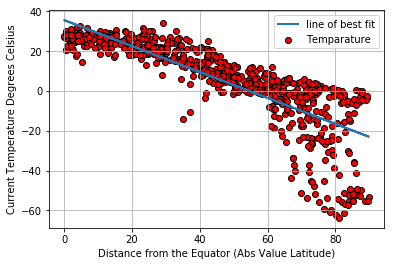

In [15]:
#temp Graph
from scipy.stats import linregress

plt.scatter(x_axis, temps_axis, marker="o", facecolors="red", edgecolors="black")
plt.grid(True)
plt.xlabel("Distance from the Equator (Abs Value Latitude)")
plt.ylabel("Current Temperature Degrees Celsius")


#best fit line
(slope1, intercept1, _, _, _) = linregress(x_axis, temps_axis)
fit1 = slope1 * x_axis + intercept1
plt.plot(x_axis, fit1, label="line of best fit", linewidth=2.0)
plt.legend()
plt.show()
            

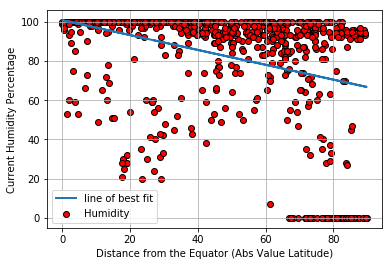

In [16]:
#humidity Graph

plt.scatter(x_axis, humidity_axis, marker="o", facecolors="red", edgecolors="black")
plt.grid(True)
plt.xlabel("Distance from the Equator (Abs Value Latitude)")
plt.ylabel("Current Humidity Percentage")


#best fit line
(slope2, intercept2, _, _, _) = linregress(x_axis, humidity_axis)
fit2 = slope2 * x_axis + intercept2
plt.plot(x_axis, fit2, label="line of best fit", linewidth=2.0)
plt.legend()
plt.show()

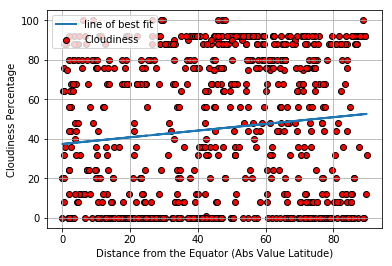

In [17]:
#cloudiness graph

plt.scatter(x_axis, cloudiness_axis, marker="o", facecolors="red", edgecolors="black")
plt.grid(True)
plt.xlabel("Distance from the Equator (Abs Value Latitude)")
plt.ylabel("Cloudiness Percentage")


#best fit line
(slope3, intercept3, _, _, _) = linregress(x_axis, cloudiness_axis)
fit3 = slope3 * x_axis + intercept3
plt.plot(x_axis, fit3, label="line of best fit", linewidth=2.0)
plt.legend()
plt.show()

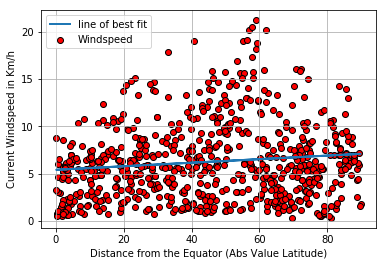

In [18]:
#windspeed graph

plt.scatter(x_axis, windspeed_axis, marker="o", facecolors="red", edgecolors="black")
plt.grid(True)
plt.xlabel("Distance from the Equator (Abs Value Latitude)")
plt.ylabel("Current Windspeed in Km/h")


#best fit line
(slope4, intercept4, _, _, _) = linregress(x_axis, windspeed_axis)
fit4 = slope4 * x_axis + intercept4
plt.plot(x_axis, fit4, label="line of best fit", linewidth=2.0)
plt.legend()
plt.show()

In [26]:
#t-test for significance

from scipy.stats import ttest_ind

(t_stat1, p1) = ttest_ind(x_axis, temps_axis, equal_var=False)
(t_stat2, p2) = ttest_ind(x_axis, humidity_axis, equal_var=False)
(t_stat3, p3) = ttest_ind(x_axis, cloudiness_axis, equal_var=False)
(t_stat4, p4) = ttest_ind(x_axis, windspeed_axis, equal_var=False)

print(f"if p value is <= 0.05, then the line of best fit relationship is significantly significant:")
print("temparture as a function of latitude p value: " + str(p1))
print("humidity as a function of latitude p value: " + str(p2))
print("cloudiness as a function of latitude p value: " + str(p3))
print("windspeed as a function of latitude p value: " + str(p4))

print("overall, all these variables but cloudiness is related to latitude, although windspeed has a weak relationship.")
      
#equal_var=false for 1 sided t test, since we are comparing 1 sample against what would be considered "random",
#and not against a different sample that would be considered what represents the null-hypothesis

if p value is <= 0.05, then the line of best fit relationship is significantly significant:
temparture as a function of latitude p value: 1.0661646959033342e-165
humidity as a function of latitude p value: 1.0640391346774573e-124
cloudiness as a function of latitude p value: 0.7854345234002923
windspeed as a function of latitude p value: 6.758462939998799e-186
overall, all these variables but cloudiness is related to latitude, although windspeed has a weak relationship
